In [4]:
# imports
# This tutorial was designed and prepared by Dalya Baron, and all credit of it goes to her.

%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Dimensionality Reduction Algorithms 1 - PCA and variants
In this notebook we will focus on Principle Component Analysis (PCA) as a dimensionality reduction tool. <br>
We will then examine two additional decompositions: Independent Component Analysis (ICA) and Non-negative matrix factorization (NMF or NNMF). <br>
We will compare the three methods for several datasets: <br>
1. Simple two dimensional dataset. <br>
2. Simulated stellar spectra.

## Principle Component Analysis
We will use the **sklearn** implementation of PCA: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
Very nice tutorial: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Text(0, 0.5, 'y')

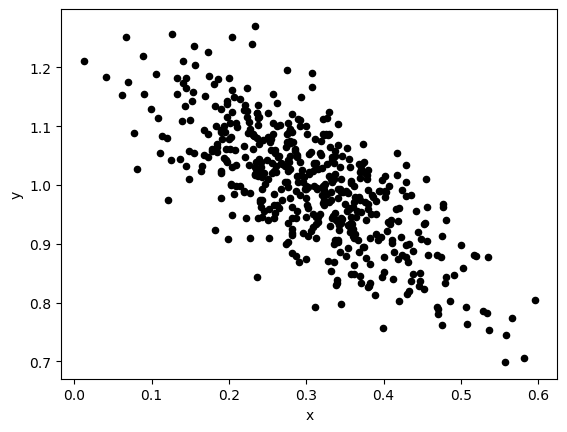

In [7]:
# start by simulating a simple dataset with 2 dimensions, where the output is expected

size = 500
mean = np.array([0.3, 1.0])
cov = np.array([[0.01, -0.007], [-0.007, 0.01]])
X = np.random.multivariate_normal(mean, cov, size=size)

# plot dataset
plt.scatter(X[:, 0], X[:, 1], c="k", s=20)
plt.xlabel("x")
plt.ylabel("y")

variance in the components:  [0.01715206 0.00273384]
components:  [[ 0.69488375 -0.71912208]
 [-0.71912208 -0.69488375]]


Text(0, 0.5, 'y')

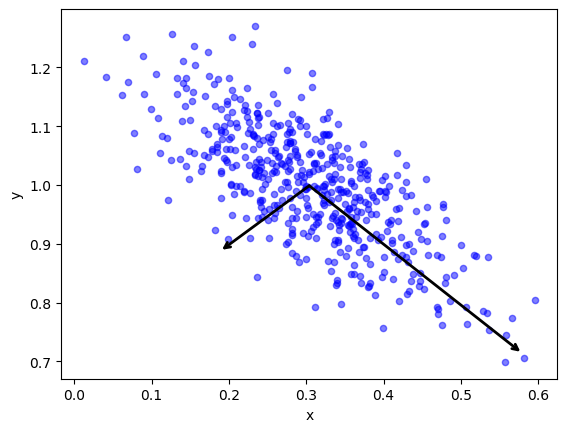

In [10]:
# run PCA on this dataset

pca = PCA(n_components=2)
pca.fit(X)

# extract the variance of each of the components
variance = pca.explained_variance_
print("variance in the components: ", variance)

# extract the components
components = pca.components_
print("components: ", components)

# plot components 
ax = plt.gca()
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)
    
pca_mean = pca.mean_
for variance_comp, vector_comp in zip(variance, components):
    sigma_comp = np.sqrt(variance_comp)
    vector_plot = vector_comp * 3 * sigma_comp
    ax.annotate('', pca_mean + vector_plot, pca_mean, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], c="b", alpha=0.5, s=20)
plt.xlabel("x")
plt.ylabel("y")    

shape of original dataset:  (500, 2)
shape of reduced dataset:  (500, 1)


Text(0, 0.5, 'y')

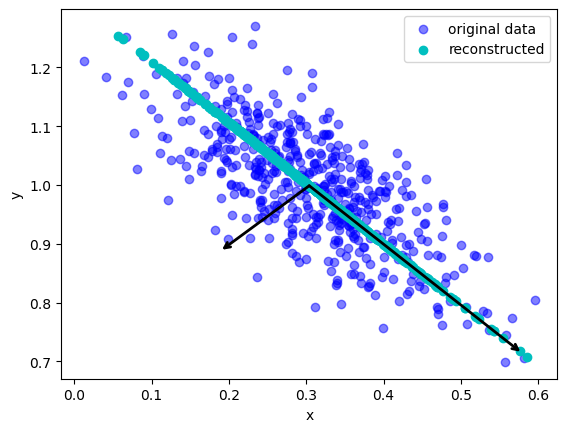

In [13]:
# we will now examine how PCA can be used to perform dimensionality reduction
# in our simple case of a two dimensional dataset, we can only reduce the dataset to a single dimension.

pca = PCA(n_components=1)
pca.fit(X)
X_reduced = pca.transform(X) 
print("shape of original dataset: ", X.shape)
print("shape of reduced dataset: ", X_reduced.shape)

# in order to examine the result of the reduction, let's perform the inverse transform and 
# compare the original data to the reconstructed data
X_reconstructed = pca.inverse_transform(X_reduced)

plt.scatter(X[:, 0], X[:, 1], c="b", alpha=0.5, label="original data")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c="c", label="reconstructed")
plt.legend(loc="best")

# plot components 
ax = plt.gca()
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)
    
pca_mean = pca.mean_
for variance_comp, vector_comp in zip(variance, components):
    sigma_comp = np.sqrt(variance_comp)
    vector_plot = vector_comp * 3 * sigma_comp
    ax.annotate('', pca_mean + vector_plot, pca_mean, arrowprops=arrowprops)

plt.xlabel("x")
plt.ylabel("y")

### Question to student 1: 
Repeat the process for a simple two dimensional dataset with an outlier (or a few outliers). <br>
1. What happens to the principle components and the variance of each component? <br>
2. How does the result change as a function of the size of the dataset? the distance of the outlier from the main population of objects?

### Question to student 2:
Repeat the process for a simple two dimensional dataset where x and y have different units. <br>
Specifically, what happens when we multiply y by 1000? <br>
What happens if y has a much larger dynamical range than x?

## PCA on a dataset with two clusters
We will now examine the output of PCA for a dataset with two clusters. <br>
Specifically, we will check whether PCA dimensionality reduction can distinguish between the two different clusters.

Text(0, 0.5, 'y')

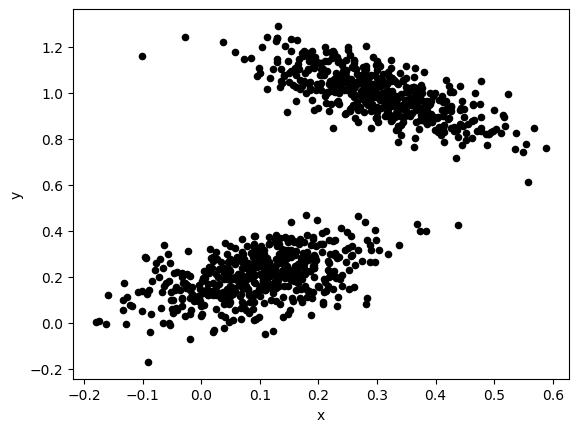

In [16]:
# two cluster dataset with well-separated clusters

size = 500
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
cluster_1 = np.random.multivariate_normal(mean_1, cov_1, size=size)

mean_2 = np.array([0.3, 1.0])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
cluster_2 = np.random.multivariate_normal(mean_2, cov_2, size=size)

X = np.concatenate([cluster_1, cluster_2])

# plot dataset
plt.scatter(X[:, 0], X[:, 1], c="k", s=20)
plt.xlabel("x")
plt.ylabel("y")

variance in the components:  [0.17826408 0.01057701]
components:  [[-0.24192444 -0.97029509]
 [-0.97029509  0.24192444]]


Text(0, 0.5, 'y')

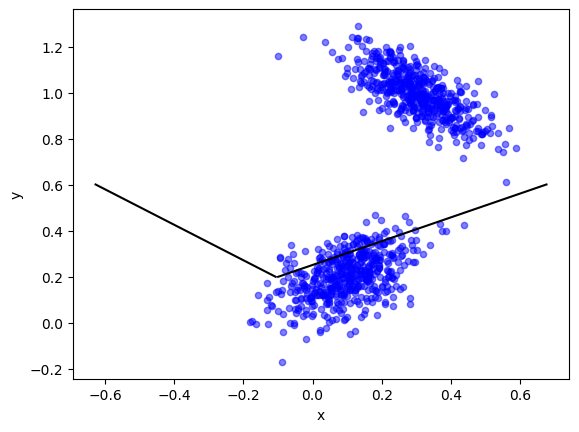

In [19]:
# PCA decomposition with two components

pca = PCA(n_components=2)
pca.fit(X)

# extract the variance of each of the components
variance = pca.explained_variance_
print("variance in the components: ", variance)

# extract the components
components = pca.components_
print("components: ", components)

# plot components 
ax = plt.gca()
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)
    
pca_mean = pca.mean_
for variance_comp, vector_comp in zip(variance, components):
    sigma_comp = np.sqrt(variance_comp)
    vector_plot = vector_comp * 3 * sigma_comp
    plt.plot(pca_mean + vector_plot, pca_mean, "k")

plt.scatter(X[:, 0], X[:, 1], c="b", alpha=0.5, s=20)
plt.xlabel("x")
plt.ylabel("y")


(1000, 2)


Text(0, 0.5, 'N')

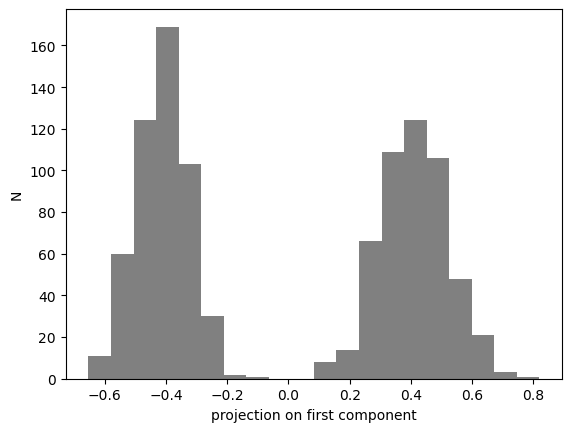

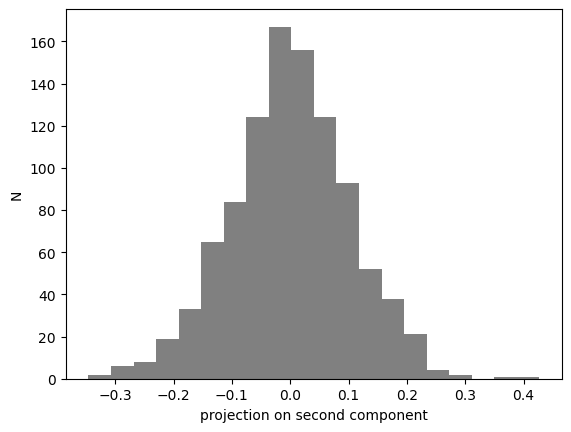

In [23]:
# let's examine the projection of the dataset on the two components

X_transform = pca.transform(X) 
print(X_transform.shape)

plt.figure(1)
tmp = plt.hist(X_transform[:, 0], bins=20, color="grey")
plt.xlabel("projection on first component")
plt.ylabel("N")

plt.figure(2)
tmp = plt.hist(X_transform[:, 1], bins=20, color="grey")
plt.xlabel("projection on second component")
plt.ylabel("N")

### Question to student: 
Can PCA be used in this case to find two clusters in the dataset? <br>
Try to find cases in which PCA cannot identify clusters in a dataset!

## Independent Component Analysis and Non-negative matrix factorization
We will now compare the output of PCA to that of ICA and NNMF. <br>
We will start with the simple two dimensional dataset used above. <br>
fast ICA: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA <br>
NMF: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF

Text(0, 0.5, 'y')

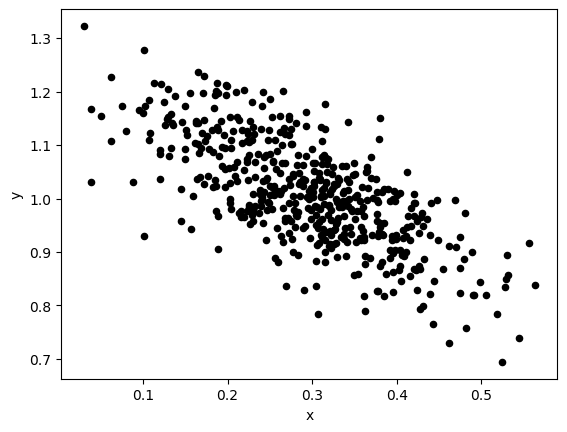

In [24]:
# start by simulating a simple dataset with 2 dimensions, where the output is expected

size = 500
mean = np.array([0.3, 1.0])
cov = np.array([[0.01, -0.007], [-0.007, 0.01]])
X = np.random.multivariate_normal(mean, cov, size=size)

# plot dataset
plt.scatter(X[:, 0], X[:, 1], c="k", s=20)
plt.xlabel("x")
plt.ylabel("y")

/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF axis 2')

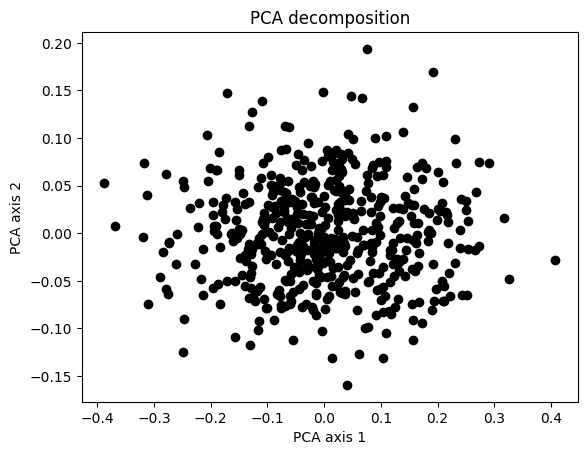

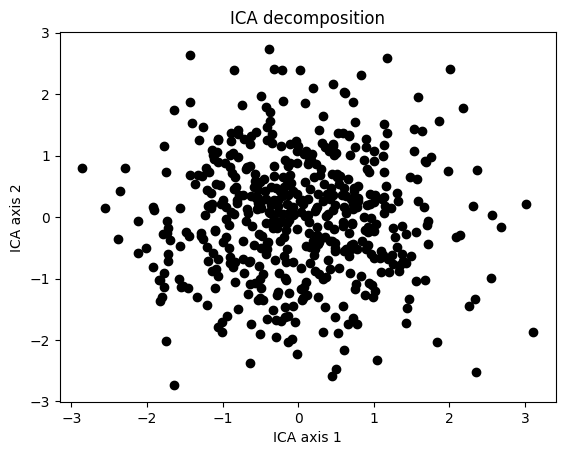

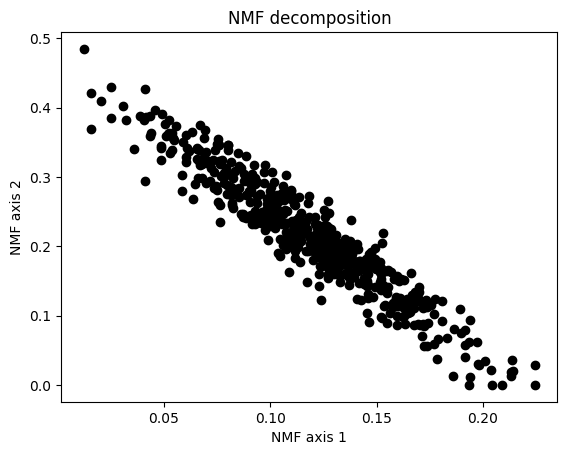

In [28]:
# comparison of PCA, ICA, and NNMF, decomposition to two components

# PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca_trans = pca.transform(X)
plt.figure(1)
plt.title("PCA decomposition")
plt.scatter(X_pca_trans[:, 0], X_pca_trans[:, 1], c="k")
plt.xlabel("PCA axis 1")
plt.ylabel("PCA axis 2")

# ICA - here we need to fit the transpose!
ica = FastICA(n_components=2)
ica.fit(X)
X_ica_trans = ica.transform(X)
plt.figure(2)
plt.title("ICA decomposition")
plt.scatter(X_ica_trans[:, 0], X_ica_trans[:, 1], c="k")
plt.xlabel("ICA axis 1")
plt.ylabel("ICA axis 2")


# NMF - here we need to make sure that all observations are above zero
X_pos = np.copy(X)
X_pos[X_pos < 0] = 0 # this will change the dataset a bit
nmf = NMF(n_components=2)
nmf.fit(X_pos)
X_nmf_trans = nmf.transform(X_pos)
plt.figure(3)
plt.title("NMF decomposition")
plt.scatter(X_nmf_trans[:, 0], X_nmf_trans[:, 1], c="k")
plt.xlabel("NMF axis 1")
plt.ylabel("NMF axis 2")

### Question to student:
Plot the components of each of the decomposition methods together with the original data. <br>
What can you say about the differenece between the different methods?

## Spectra Decomposition
In this example we will create synthethic spectra by adding two spectra of different stars, and one emission line spectrum. <br>
For this dataset, we will examine the principle components given by PCA, and compare them to the components given by ICA and NNMF.

In [8]:
# load two stellar spectra from the data directory
# one star is of age 0.3 Gyr, and the second of 4 Gyr
import numpy as np
# template wavelength
wavelength = np.arange(3540.5, 7409.6+0.9, 0.9)

# stellar spectra
path1 = "data/stellar_spectra_sample/Mch1.30Zp0.06T00.3000_iTp0.00_baseFe_linear_FWHM_2.51.fits"
h1 = fits.open(path1)
spectrum1 = h1[0].data

path2 = "data/stellar_spectra_sample/Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits"
h2 = fits.open(path2)
spectrum2 = h2[0].data

# emission line spectrum
emission_line_spectrum = numpy.zeros(len(wavelength))
wavelength_list = [4500., 5500., 6000.0, 6200.0]
amp_list = [0.5, 0.2, 0.4, 0.3]
std_list = [20.0, 10.0, 20.0, 20.0]
for i in xrange(len(wavelength_list)):
    emission_line_spectrum += amp_list[i] * numpy.exp(-(wavelength - wavelength_list[i])**2/(2*std_list[i]**2))

# plot the two spectra
plt.figure(1)
plt.plot(wavelength, spectrum1/spectrum1.mean(), "k", label="0.3 Gyr")
plt.xlabel("wavelength (A)")
plt.ylabel("noemalized spectrum")
plt.figure(2)
plt.plot(wavelength, spectrum2/spectrum2.mean(), "b", label="4 Gyr")
plt.xlabel("wavelength (A)")
plt.ylabel("noemalized spectrum")
plt.figure(3)
plt.plot(wavelength, emission_line_spectrum, "r", label="gas emission")
plt.xlabel("wavelength (A)")
plt.ylabel("noemalized spectrum")
#plt.legend(loc="best")

<class 'OSError'>: [Errno 43] No such device

In [36]:
# construct synthethic data as follows: add the spectra with different weights, and add an emission line spectrum on top

spectrum1_norm = spectrum1/spectrum1.mean()
spectrum2_norm = spectrum2/spectrum2.mean()

# we will now run 1000 iterations, in each iteration we will add the spectra with some random weights
n_sample = 1000
spectra_list = []
for i in xrange(n_sample):
    w1 = np.random.uniform(0., 1)
    w2 = np.random.uniform(0., 1)
    w_emission_lines = np.random.uniform(0.5, 2)
    
    final_spectrum = w1 * spectrum1_norm + w2 * spectrum2_norm + w_emission_lines * emission_line_spectrum
    spectra_list.append(final_spectrum)
    
print len(spectra_list)

<class 'SyntaxError'>: Missing parentheses in call to 'print'. Did you mean print(...)? (<ipython-input-36-e2344bcdf579>, line 17)

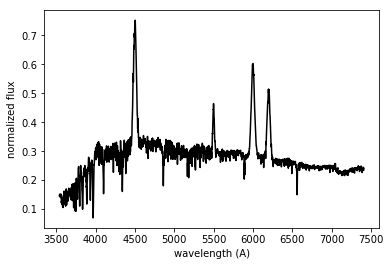

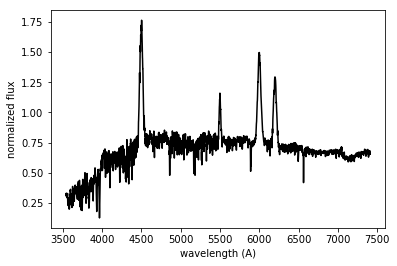

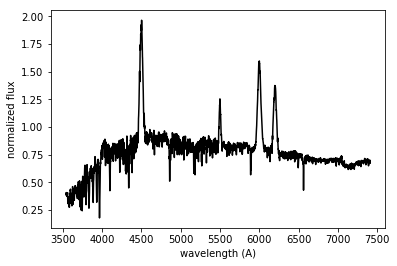

In [94]:
# let's plot three examples of the resulting spectra

plt.figure(1)
plt.plot(wavelength, spectra_list[13], "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalized flux")

plt.figure(2)
plt.plot(wavelength, spectra_list[89], "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalized flux")

plt.figure(3)
plt.plot(wavelength, spectra_list[156], "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalized flux")

In [95]:
# now, examine the decomposition by the different methods
spectra_list = np.array(spectra_list)
spectra_mean = spectra_list.mean(0)

# PCA
pca = PCA(n_components=4)
pca.fit(spectra_list)
pca_comp = np.vstack([spectra_mean, pca.components_])
print pca_comp.shape

# ICA
ica = FastICA(4)
ica.fit(spectra_list.T)
ica_comp = np.vstack([spectra_mean, ica.transform(spectra_list.T).T])
print ica_comp.shape

# NMF
spectra_list[spectra_list < 0] = 0
nmf = NMF(5)
nmf.fit(spectra_list)
nmf_comp = nmf.components_
print nmf_comp.shape

(5, 4300)
(5, 4300)
(5, 4300)


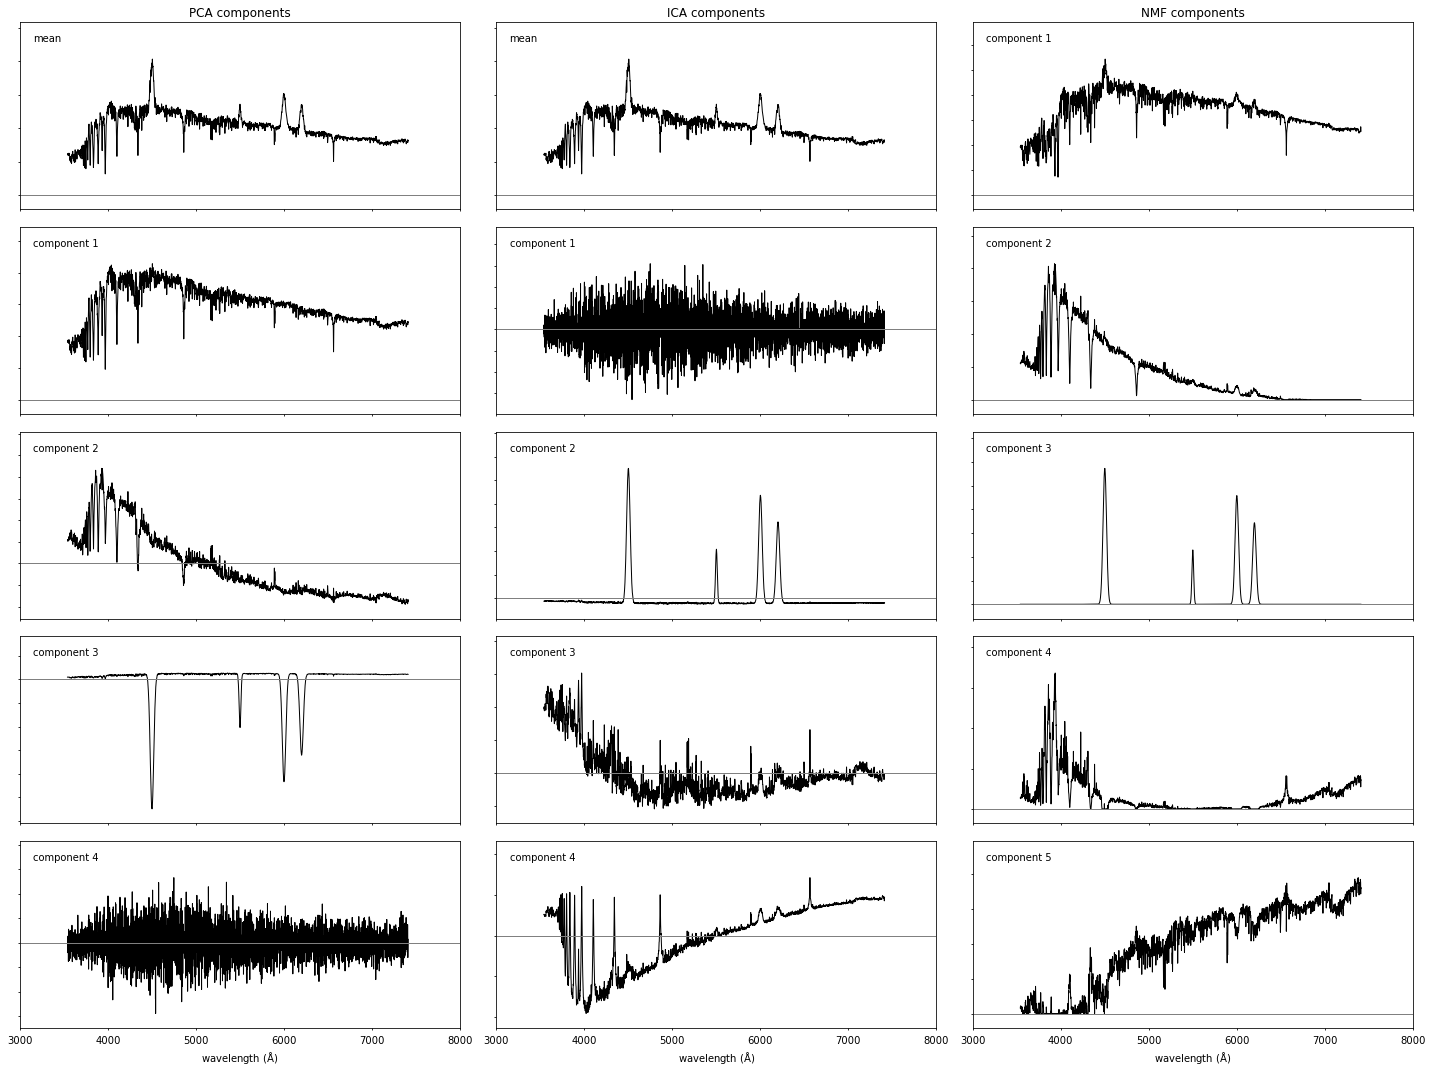

In [96]:
# plot the different components - this code was taken from: 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

n_components = 5
decompositions = [pca_comp, ica_comp, nmf_comp]

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components', 'ICA components', 'NMF components']

for i, comp in enumerate(decompositions):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.set_xlabel(r'wavelength ${\rm (\AA)}$')

        ax.plot(wavelength, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 7999]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
        ax.set_xlim(xlim)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines(): 
            l.set_markersize(2) 

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

plt.tight_layout()
plt.show()

### Questions to student:
1. Try to increase the size of the sample. Does it change the results? <br>
2. In this example we didn't add noise to the synthetic dataset. Add noise and examine the results. <br>
3. Plot the 1000 spectra on the 2d projected plane of each of the decompositions. <br>
4. Construct synethtic dataset with additional stellar spectra (see data directory) and repeat process. <br>

# Dimensionality Reduction Algorithms 2 - tSNE
In this part of the notebook we will explore the tSNE algorithm for dimensionality reduction. <br>
We will examine the effect of perplexity on the tSNE output and try to find the "optimal" value. <br> <br>
We will create synthetic dataset that is composed of two stellar spectra, mixed with different weights. <br>
We will create a sequence of such weights, resulting in a sequence of spectra.

In [ ]:
# load the stellar spectra

wavelength = numpy.arange(3540.5, 7409.6 + 0.9, 0.9)

# stellar spectra
path1 = "data2/stellar_spectra_sample/Mch1.30Zp0.06T00.3000_iTp0.00_baseFe_linear_FWHM_2.51.fits"
h1 = fits.open(path1)
spectrum1 = h1[0].data

path2 = "data2/stellar_spectra_sample/Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits"
h2 = fits.open(path2)
spectrum2 = h2[0].data

plt.plot(wavelength, spectrum1/numpy.max(spectrum1), "k")
plt.plot(wavelength, spectrum2/numpy.max(spectrum2), "b")
plt.xlabel("wavelength")
plt.ylabel("normalised flux")

In [110]:
def return_normalised_spectra():
    """
    function returns the two normalised spectra I will work with
    """
    path1 = "/Users/dalyabaron/Documents/new_scripts/ppxf-upstream/miles_models_final_use/Mch1.30Zp0.06T00.3000_iTp0.00_baseFe_linear_FWHM_2.51.fits"
    h = fits.open(path1)
    spec1 = h[0].data

    path2 = "/Users/dalyabaron/Documents/new_scripts/ppxf-upstream/miles_models_final_use/Mch1.30Zp0.06T10.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits"
    h = fits.open(path2)
    spec2 = h[0].data
    
    return spec1/numpy.max(spec1), spec2/numpy.max(spec2)
    

def return_data_mixed_stars(N_obj):
    """
    function returns spectra which are a combination of two stellar spectra, with different weights
    in this function, the weights will sum up to 1
    """
    weights = numpy.linspace(0, 1, N_obj)
    spec1, spec2 = return_normalised_spectra()
    
    spectra_list = []
    for i in xrange(N_obj):
        combined_spec = spec1 * weights[i] + spec2 * (1 - weights[i])
        spectra_list.append(combined_spec)
    spectra_list = numpy.array(spectra_list)
    return spectra_list

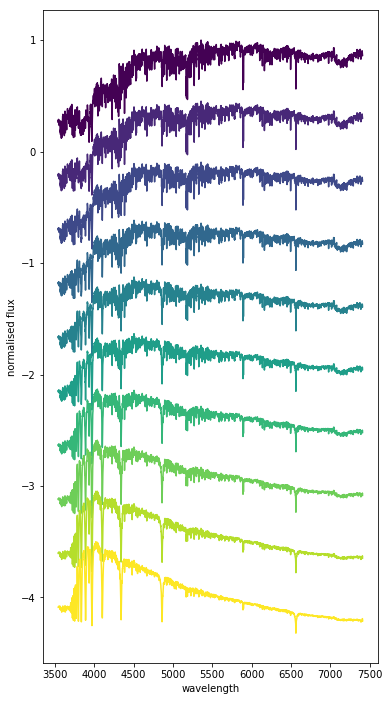

In [112]:
# create N spectra to play with, and plot them

N_obj = 10
spectra_list = return_data_mixed_stars(N_obj)
index = numpy.arange(N_obj)

# now plot them according to their index
norm = mpl.colors.Normalize(vmin=index[0], vmax=index[-1])
cmap = cm.viridis
m = cm.ScalarMappable(norm=norm, cmap=cmap)

plt.figure(figsize=(6, 12))

for i in xrange(N_obj):
    plt.plot(wavelength, spectra_list[i] - 0.5*i, color=m.to_rgba(i))

plt.xlabel("wavelength")
plt.ylabel("normalised flux")

(100, 2)


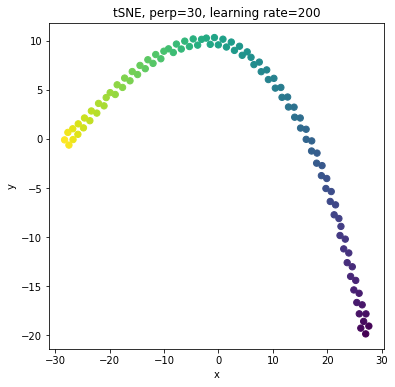

In [114]:
# now, we will increase the sample to 100 objects, and examine the output of tSNE

N_obj = 100
spectra_list = return_data_mixed_stars(N_obj)
indices = numpy.arange(N_obj)

result = TSNE(perplexity=10.0, learning_rate=20.0, metric='euclidean', n_components=2).fit_transform(spectra_list)
print result.shape

x = result[:, 0]
y = result[:, 1]

plt.rcParams['figure.figsize'] = 6, 6
plt.title("tSNE, perp=30, learning rate=200")
plt.scatter(x, y, c=indices, s=40)
plt.xlabel("x")
plt.ylabel("y")

### Question to student:
Examine different values of perplexity and different values of learning rate. <br>
Can you find the "best" perplexity value for this dataset? <br>


### Question to student:
Simulate a dataset with two clusters (or more!) and run tSNE. You are advised to simulate a complex dataset, e.g., with the stellar spectra provided with this tutorial. <br>
Can you find the optimal value for the perplexity? <br>
Hint: the tSNE module can return the *kl_divergence_*, which is the cost function of tSNE. <br>
Read more about the KL divergence here: https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence <br>
The KL divergence is a measure of similarity to two probability distribution functions. <br>